## roadmap by combining different analysis
### use function as fit all are correct make changes according to data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('FC_PastThreeYears_Zone3')

Basic data information

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


HANDELING MISSING VALUE

In [6]:
missValSum=df.isnull().sum() #type is series
print(missValSum)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In Percent

In [7]:
temp=missValSum.values/df.shape[0]*100 # return ndarray
missValPerc=[np.round(x,2) for x in temp]
indexVal=missValSum.index.tolist()
finalPer=pd.Series(dict(zip(indexVal,missValPerc)))
print(finalPer)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [8]:
pd.concat([missValSum.rename('total number'),finalPer.rename('percentage')], axis=1)

,total number,percentage
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


Heatmap For Missing Value

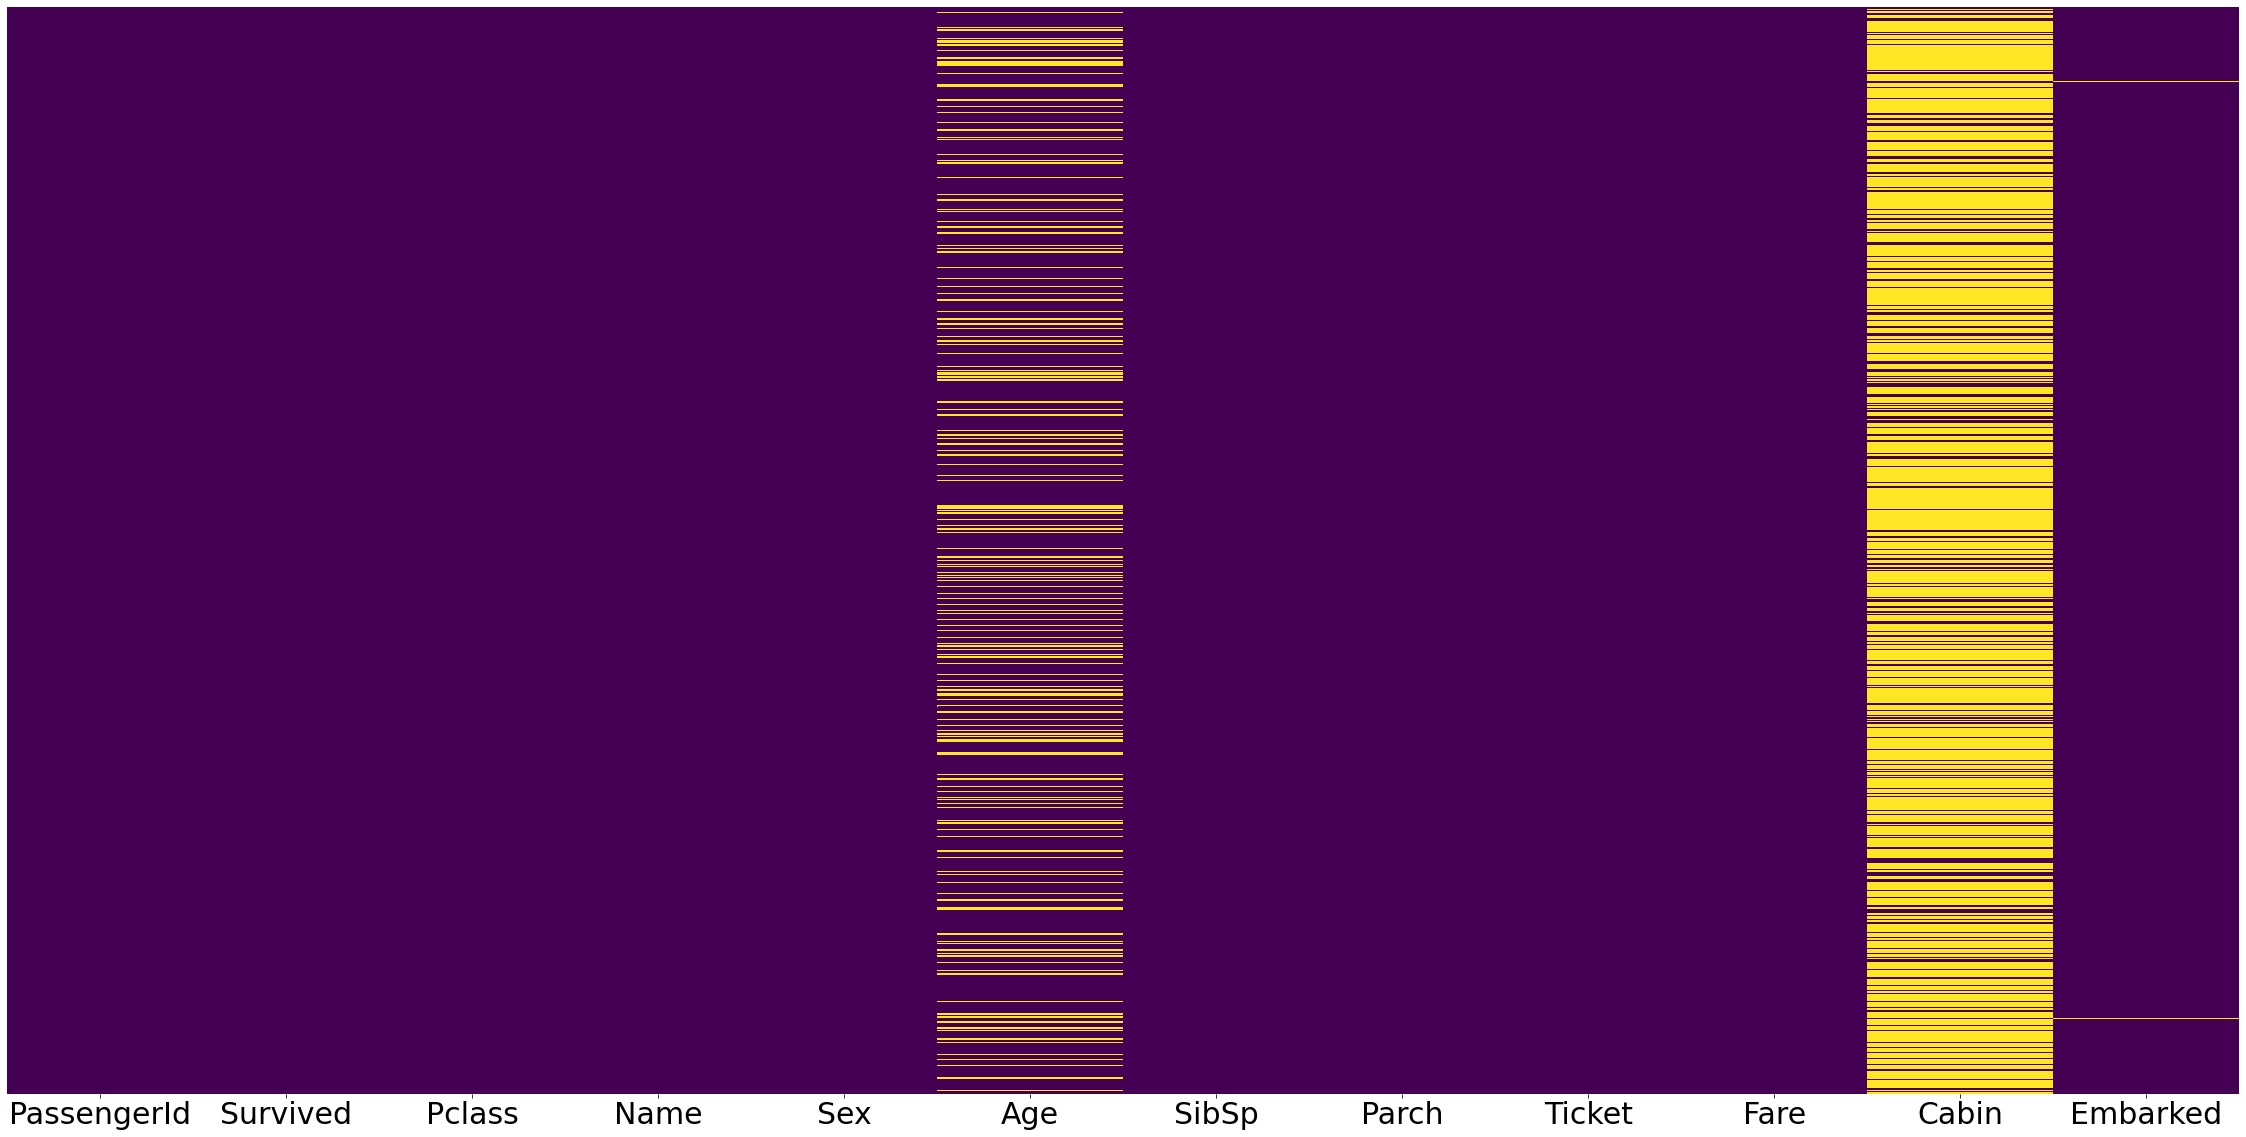

In [9]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',)
plt.xticks(rotation=0)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

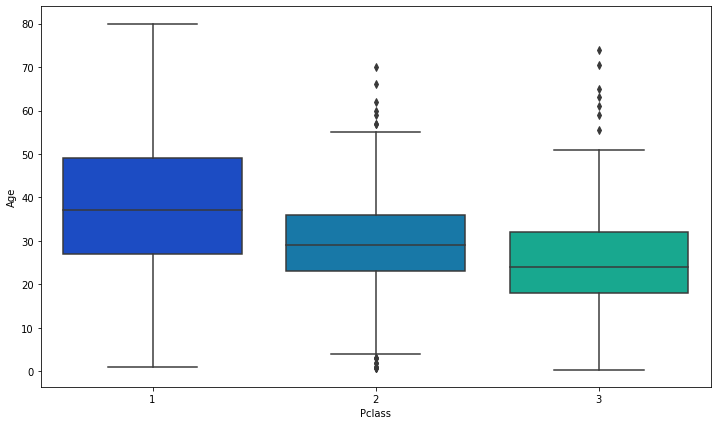

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [11]:
#mean of age classifiyed by  
a=df.groupby('Pclass').Age.mean()
a

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

replacing age missing value by mean of age classified by pclass

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

applying function

In [13]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

droping Cabin due to high numbers of missing value.<br>
droping missing value in Embarked due to low numbers<br>
droping irrelevant features like PassengerId, Name, Ticket

In [14]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df.dropna(inplace=True)

Heat map after handeling missing value

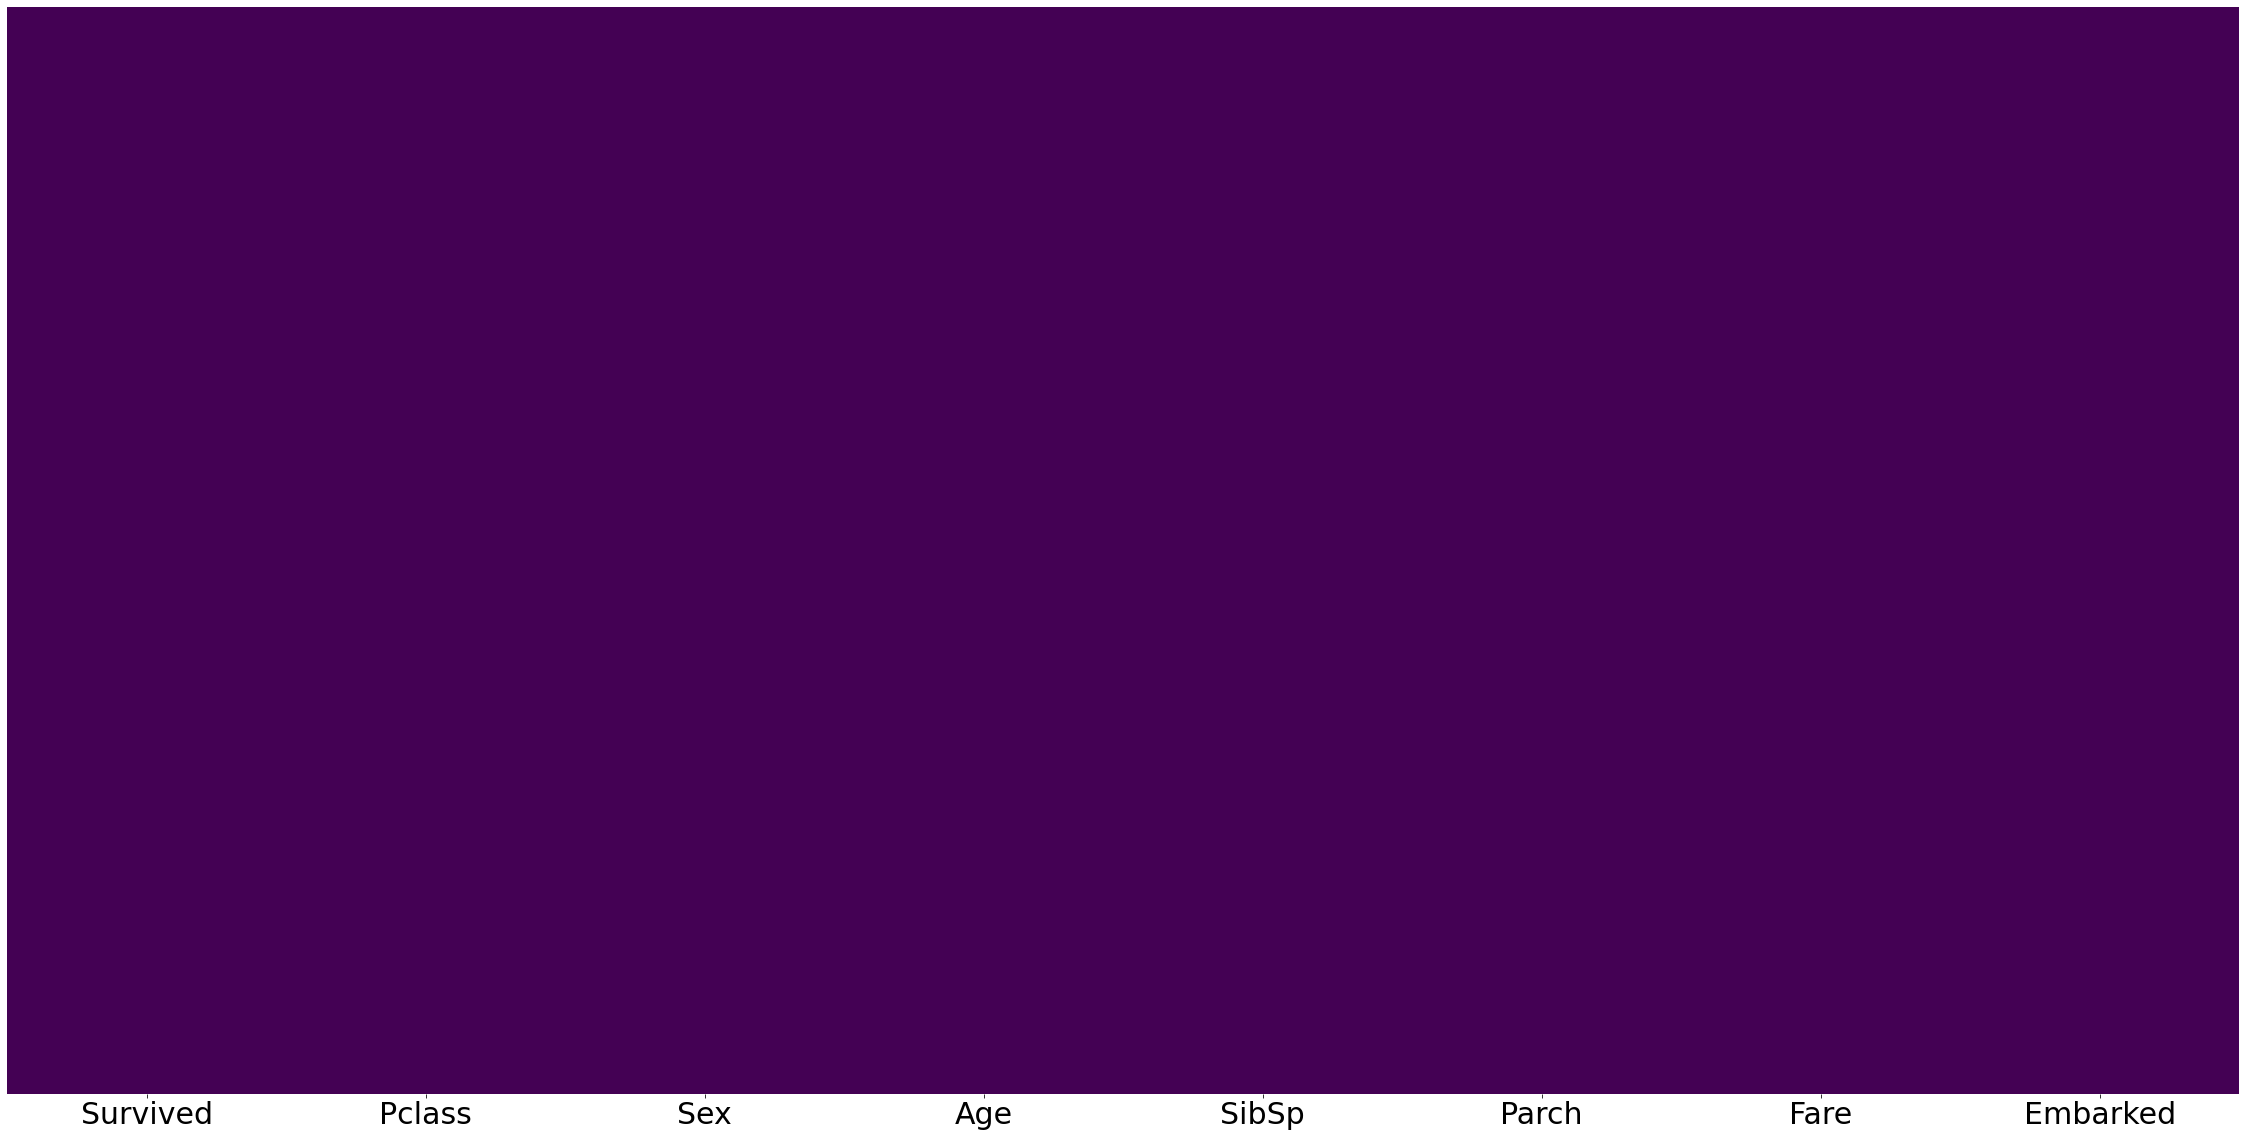

In [15]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(40, 20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',)
plt.xticks(rotation=0)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.tick_params(axis='both', which='minor', labelsize=10)
plt.show()

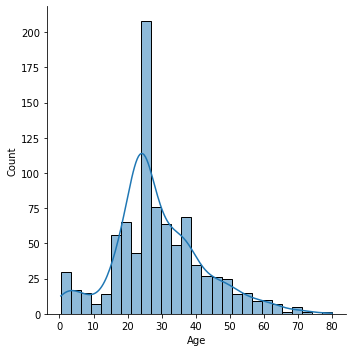

In [31]:
data=df['Age']
#%%frequency distribution histogram
sns.displot(data,kde=True) #counting occurance

In [35]:
df['Age'].agg(['max', 'min', 'count', 'median', 'mean'])

max        80.000000
min         0.420000
count     889.000000
median     26.000000
mean       29.019314
Name: Age, dtype: float64

HANDELING OUTLIERS

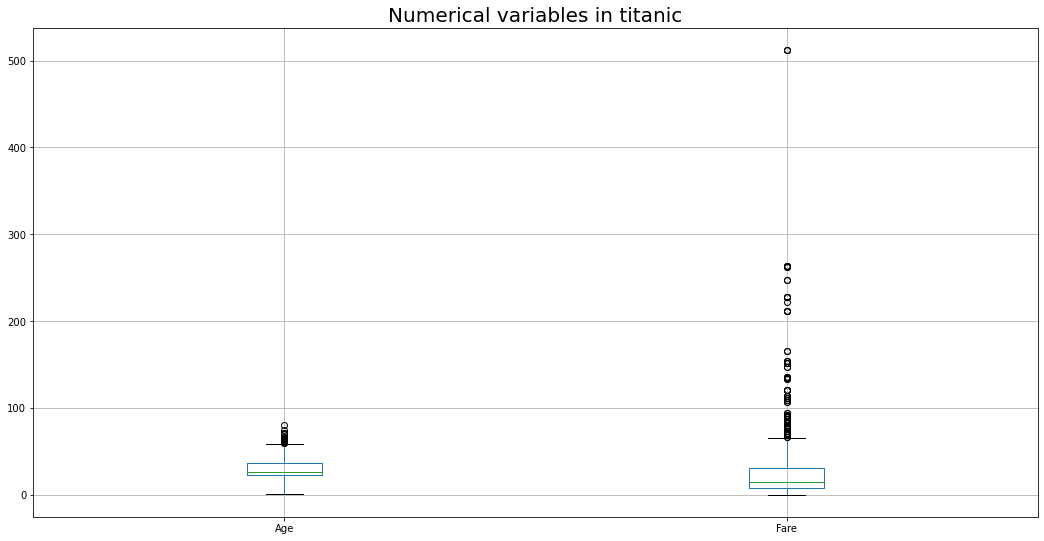

In [17]:
num_cols = ['Age','Fare']
plt.figure(figsize=(18,9))
df[num_cols].boxplot()
plt.title("Numerical variables in titanic", fontsize=20)
plt.show()

In [19]:
df[df.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [28]:
temp=df[df.Embarked== 'C']
temp=    temp[df.Pclass==1]
temp[]

<ipython-input-28-444102a55727>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp=temp[df.Pclass==1]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
30,0,1,male,40.0,0,0,27.7208,C
31,1,1,female,37.0,1,0,146.5208,C
34,0,1,male,28.0,1,0,82.1708,C
52,1,1,female,49.0,1,0,76.7292,C
...,...,...,...,...,...,...,...,...
839,1,1,male,37.0,0,0,29.7000,C
842,1,1,female,30.0,0,0,31.0000,C
849,1,1,female,37.0,1,0,89.1042,C
879,1,1,female,56.0,0,1,83.1583,C


Its found that outliers was entry mistake therefore it will be replaced